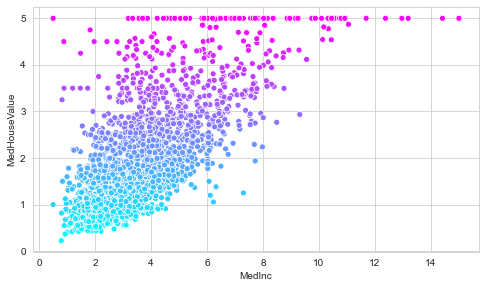

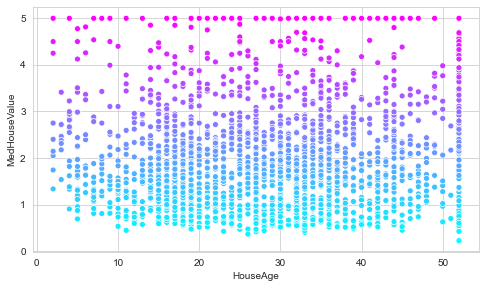

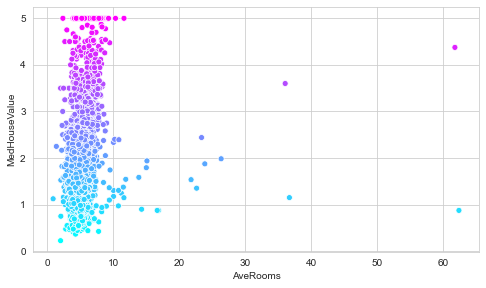

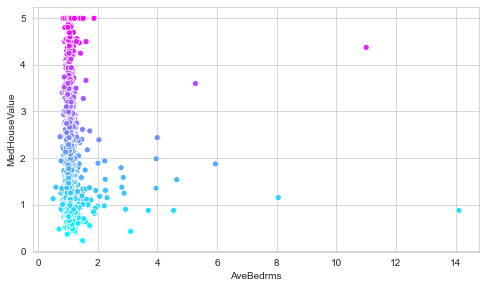

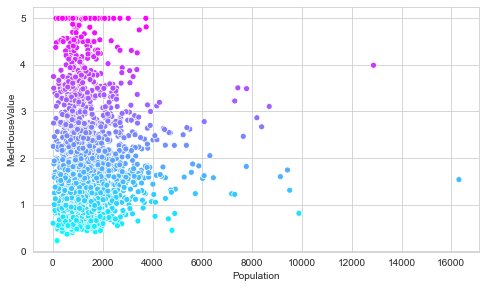

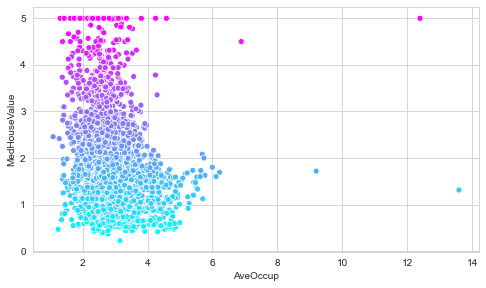

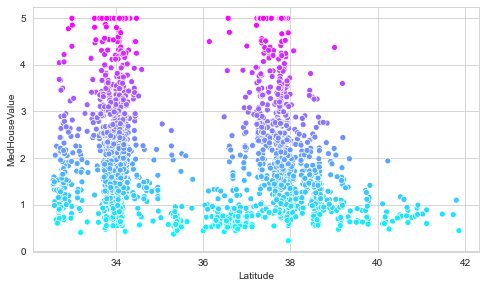

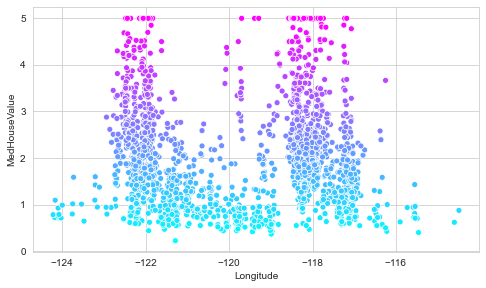

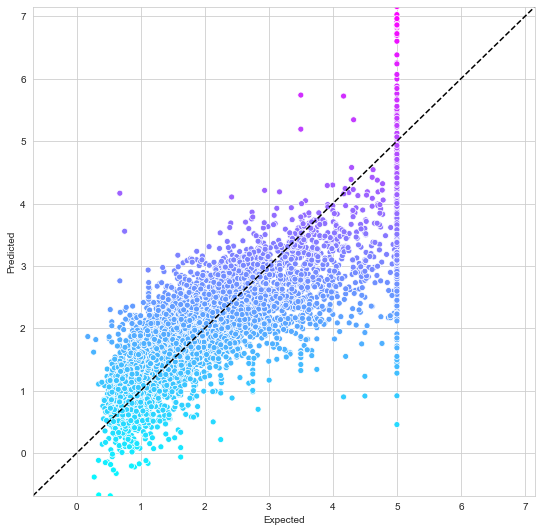

In [9]:
# weixin Liu(041008492) python project 

import tkinter as tk
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np
from sklearn import datasets

class Interface():
    def __init__(self,window):
        
        window.title("Weixin's Project")
        self.label1 = Label(window, text="Multiple Linear Regression with SkLearn datasets")
        self.label1.grid(row=0,column=1,sticky="n")
        self.label2 = Label(window, text="Please enter the format with fetch_ or load_\n E.g 'fetch_california_housing',  'load_digits'")
        self.label2.grid(row=1, column=0,sticky="w")
        
        self.input= Entry(window,width = 35)
        self.input.grid(row=1,column=1)
        
        button1=Button(window,text= "1.Show describe", command=self.describe)
        button1.grid(row=2,column=0)
        
        button2=Button(window,text= "2.Shape and featurenames", command=self.sf)
        button2.grid(row=2,column=1)
        
        button3=Button(window,text= "3.Exploring Data", command=self.explore)
        button3.grid(row=2,column=2)
        
        button4=Button(window,text= "4.Show visuals", command=self.showv)
        button4.grid(row=3,column=0)
        
        button5=Button(window,text= "5.splitting data show shape", command=self.splitdata)
        button5.grid(row=3,column=1)
        
        button6=Button(window,text= "6.Training the model", command=self.Linearg)
        button6.grid(row=3,column=2)
        
        button7=Button(window,text= "7.Testing the model", command=self.testing)
        button7.grid(row=4,column=0)
        
        button8=Button(window,text= "8.Visualizing the expected vs predicted", command=self.visualizing)
        button8.grid(row=4,column=1)
        
        button9=Button(window,text= "9.Model Metrics", command=self.metrics)
        button9.grid(row=4,column=2)
      
        self.info = Text(window, height =15, width=100)
        self.info.grid(row=6,column=0,columnspan=3,padx=10)
        
        
        quit = Button(window,text="Exit",width=10,command=window.destroy)
        quit.grid(row=10,column=4)
    
    
    # loading data     
    def loading(self):
        Input = self.input.get()
        try:
            exec("from sklearn.datasets import %s"%Input)
        except:
            tk.messagebox.showinfo("Warning",
            "Please enter the correct format with fetch_ or load_ \n Your file doesn't exist in sklearn datasets.")
        else: 
            exec("from sklearn.datasets import %s"%Input)
            self.data=eval("%s()"%Input)
    
    # print describe
    def describe(self):
        self.loading()
        self.info.delete(1.0,'end')
        self.info.insert(END,self.data.DESCR)
    
    # show data shape and feature  names
    def sf(self):
        self.loading()
        self.info.delete(1.0,'end')
        self.info.insert(END,">Data shape: "+ str(self.data.data.shape)+'\n')
        self.info.insert(END,">Target shape: "+str(self.data.target.shape)+'\n')
        self.info.insert(END,">Feature_name: "+str(self.data.feature_names))
    
    # explore the data 
    def explore(self):
        self.loading()
        import pandas as pd
        pd.set_option('precision',4)
        self.data.df = pd.DataFrame(self.data.data,columns=self.data.feature_names)
        self.data.df['MedHouseValue']=pd.Series(self.data.target)
        self.info.delete(1.0,'end')
        self.info.insert(END,"--------------------------------------------------------------------"
                         + str(self.data.df.head) + '\n')
        self.info.insert(END, "-------------------------------------------------------------------"
                         +str(self.data.df.describe) + '\n'+"------------------end-------------------")
        
    #  show graphs in the new window    
    def showv(self):
        self.loading()
        import pandas as pd
        pd.set_option('precision',4)
        self.data.df = pd.DataFrame(self.data.data,columns=self.data.feature_names)
        self.data.df['MedHouseValue']=pd.Series(self.data.target)
        self.info.delete(1.0,'end')
        self.info.insert(END,self.data.df.head)
        self.info.insert(END,self.data.df.describe)
        self.data.s = self.data.df.sample(frac=0.1,random_state=17)
        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set_style('whitegrid')
        NewWindow =  tk.Toplevel()
        r=0
        c=0
        for feature in  self.data.feature_names:
            NewFigure = plt.figure(figsize=(8,4.5))
            sns.scatterplot(data=self.data.s, x=feature, 
                            y='MedHouseValue',hue='MedHouseValue',palette='cool',legend=False)
            canvas =  FigureCanvasTkAgg(NewFigure, master=NewWindow)
            canvas.draw()
            if c%3==0:
                canvas.get_tk_widget().grid(row=r,column=0)
                c=c+1
            elif c%3==1:
                canvas.get_tk_widget().grid(row=r,column=1)
                c=1+1
            else:
                canvas.get_tk_widget().grid(row=r,column=2)
                r=r+1
                c=c+1
    
    def splitdata(self):
        self.loading()
        self.info.delete(1.0,'end')
        from sklearn.model_selection import train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
        self.data.data,self.data.target,random_state=11)
        self.info.insert(END,">X train: "+ str(self.x_train.shape)+'\n')
        self.info.insert(END,">X test: "+str(self.x_test.shape)+'\n')
        self.info.insert(END,">Y train: "+str(self.y_train.shape)+'\n')
        self.info.insert(END,">Y test: "+str(self.y_test.shape))
    
    def Linearg(self):
        self.loading()
        self.info.delete(1.0,'end')
        from sklearn.model_selection import train_test_split
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
        self.data.data,self.data.target,random_state=11)
        from sklearn.linear_model import LinearRegression
        self.linear_regression = LinearRegression()
        self.linear_regression.fit(X=self.x_train, y=self.y_train)
        for i, name in enumerate(self.data.feature_names):
            self.info.insert(END,f'{name:>10}: {self.linear_regression.coef_[i]}'+'\n')
        self.info.insert(END,str(self.linear_regression.intercept_))
    
    def testing(self):
        self.loading()
        self.Linearg()
        self.info.delete(1.0,'end')
        self.predicted = self.linear_regression.predict(self.x_test)
        self.expected  =  self.y_test
        self.info.insert(END,">First 5 predictions: "+ str(self.predicted[:5])+'\n')
        self.info.insert(END,">First 5 targets: "+ str(self.expected[:5]))
    
    def visualizing(self):
        self.loading()
        self.Linearg()
        self.testing()
        self.info.delete(1.0,'end')
        import matplotlib.pyplot as plt
        import seaborn as sns
        import pandas as pd
        df = pd.DataFrame()
        df['Expected'] = pd.Series(self.expected)
        df['Predicted'] = pd.Series(self.predicted)
        figure = plt.figure(figsize = (9,9))
        axes =  sns.scatterplot(data=df,x='Expected',y = 'Predicted',
                               hue = 'Predicted',palette='cool',legend=False)
        start =  min(self.expected.min(),self.predicted.min())
        end = max(self.expected.max(),self.predicted.max())
        axes.set_xlim(start,end)
        axes.set_ylim(start,end)
        line = plt.plot([start,end],[start,end],'k--')
        NewWindow2 =  tk.Toplevel()
        canvas1 = FigureCanvasTkAgg(figure, master=NewWindow2)
        canvas1.draw()
        canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    def metrics(self):
        self.loading()
        self.Linearg()
        self.testing()
        self.info.delete(1.0,'end')
        from sklearn import metrics
        self.metric =  metrics.r2_score(self.expected,self.predicted)
        self.info.insert(END,"results:" + str(self.metric)+'\n')
        from sklearn.linear_model import ElasticNet, Lasso, Ridge
        estimators = {'LinearRegression': self.linear_regression,'ElasticNet': ElasticNet(),
                      'Lasso': Lasso(),'Ridge': Ridge()}
        from sklearn.model_selection import KFold, cross_val_score
        for estimator_name, estimator_object in estimators.items():
            kfold = KFold(n_splits=10, random_state=11, shuffle=True)
            scores = cross_val_score(estimator=estimator_object,
                                     X = self.data.data, y=self.data.target,cv=kfold, scoring ='r2')
            self.info.insert(END,f'{estimator_name:>16}: '+ f'mean of r2 scores={scores.mean():.3f}'+ '\n')
            
        
root = Tk()
app = Interface(root)
root.mainloop()
        